In [43]:
import json
import numpy as np
import pandas as pd
import operator
import matplotlib.pyplot as plt

# Extra information

In [2]:
#Read the news
news = {}
for index,line in enumerate(open('../data/News_Category_Dataset_v2.json', 'r')):
    news[index]=json.loads(line)

In [5]:
category = [news[k]['category'] for k in news.keys()]

<AxesSubplot:xlabel='Categories'>

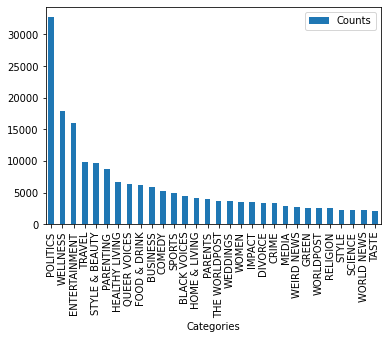

In [7]:
unique, counts = np.unique(category, return_counts=True)
df = pd.DataFrame({'Categories':unique,'Counts':counts})
df.sort_values('Counts',inplace=True,ascending=False)
df.iloc[0:30].plot.bar(x='Categories', y='Counts')

# Polarity of news

In [10]:
import nltk # URL :https://medium.com/@b.terryjack/nlp-pre-trained-sentiment-analysis-1eb52a9d742c
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/local/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [20]:
sid = SentimentIntensityAnalyzer()
ss = sid.polarity_scores(news[0]['short_description'])

In [37]:
sid = SentimentIntensityAnalyzer()
def extrac_polarity(news):
    categories = [news[k]['category'] for k in news.keys()]
    authors = [news[k]['authors'] for k in news.keys()]
    polarity = []
    for k in news.keys():
        ss = sid.polarity_scores(news[k]['short_description'])
        pol = max(ss.items(), key=operator.itemgetter(1))[0]
        if pol == 'compound':
            polarity.append('pos')
        else:
            polarity.append(pol)
    
    return pd.DataFrame({'Polarity':polarity,'Author':authors, 'Category':categories})
        

In [38]:
df = extrac_polarity(news)

In [44]:
def plot_polarity(df,category=None,author=None):
    if not category == None:
        df=df[df.Category == category]
    else:
        pass
    if not author == None:
        df=df[df.Author == author]
    else:
        pass
    df.Polarity.hist()
    plt.show()
    

## Polarity in all news

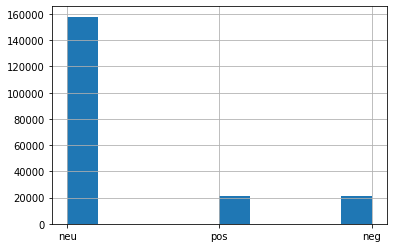

In [46]:
plot_polarity(df,category=None,author=None)

## Polarity in Politics

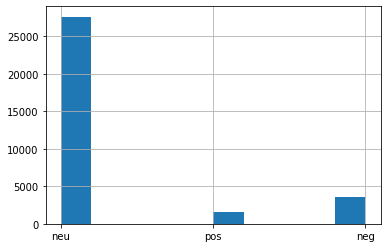

In [48]:
plot_polarity(df,category='POLITICS',author=None)

## Polarity in CRIME

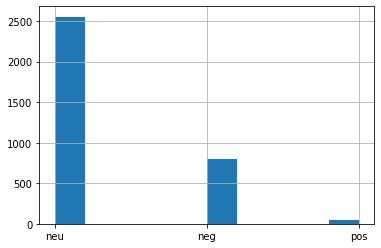

In [50]:
plot_polarity(df,category='CRIME',author=None)

## Polarity in a specific author

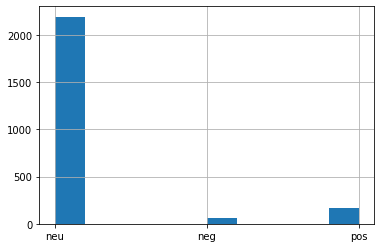

In [53]:
plot_polarity(df,category=None,author='Lee Moran')